In [1]:
import pandas as pd
import numpy as np

In [2]:

df=pd.read_csv("spam.csv",encoding='latin-1')
print(df.shape)
df

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Data Cleaning

In [3]:
df=df.iloc[:,:2]#removing the unwanted columns

In [4]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
pd.options.display.max_rows=9999
df.isnull().sum()#checking whether there's any null values or not

v1    0
v2    0
dtype: int64

In [6]:
#removing the duplicate values
duplicates=df[df.duplicated()].index
df.drop(duplicates,inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13244\2143321007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(duplicates,inplace=True)


In [7]:
df.shape

(5169, 2)

In [8]:
#changing the column names to appropriate ones
df.columns=['labels','messages']

In [9]:
df.head(5)

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['labels']=encoder.fit_transform(df['labels'])#ham is converted to 0 and spam to 1

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13244\2673492069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels']=encoder.fit_transform(df['labels'])#ham is converted to 0 and spam to 1


In [12]:
df

,labels,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


# EDA

In [13]:
df['labels'].value_counts()#to count the spam and ham values separately

0    4516
1     653
Name: labels, dtype: int64

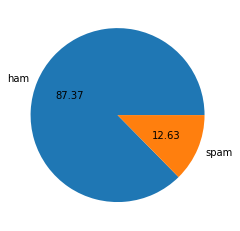

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['labels'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show()

In [15]:
import nltk

In [16]:
df["num_chars"]=df['messages'].apply(len)#creating a new column having the no. of chars in each message

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13244\3304716993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_chars"]=df['messages'].apply(len)#creating a new column having the no. of chars in each message


In [17]:
df.head()

,labels,messages,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [19]:
#creating a new columns consisting of the number of words in each message
df["num_words"]=df['messages'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head(5)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13244\2953542260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_words"]=df['messages'].apply(lambda x:len(nltk.word_tokenize(x)))


,labels,messages,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
#creating a new columns consisting of the number of sentences in each message
df["num_sents"]=df['messages'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head(5)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13244\2281428697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_sents"]=df['messages'].apply(lambda x:len(nltk.sent_tokenize(x)))


,labels,messages,num_chars,num_words,num_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
len(df['messages'])

5169

In [22]:
df[['num_chars','num_words','num_sents']].describe()

,num_chars,num_words,num_sents
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [23]:
#SPAM
df[df["labels"]==1][['num_chars','num_words','num_sents']].describe()

,num_chars,num_words,num_sents
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [24]:
#HAM
df[df["labels"]==0][['num_chars','num_words','num_sents']].describe()

,num_chars,num_words,num_sents
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [25]:
import seaborn as sns 

<AxesSubplot:xlabel='num_chars', ylabel='Count'>

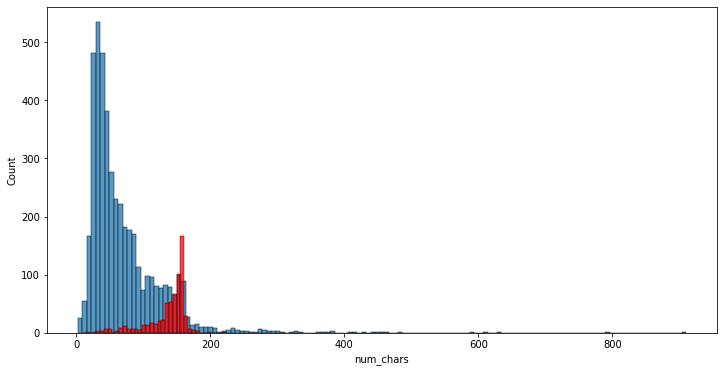

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['labels']==0]['num_chars'])
sns.histplot(df[df['labels']==1]['num_chars'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

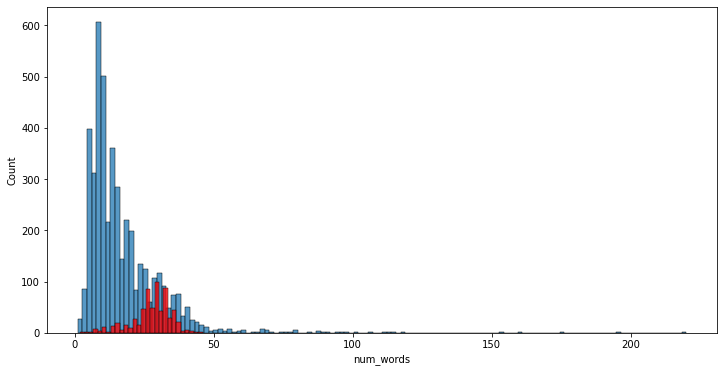

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['labels']==0]['num_words'])
sns.histplot(df[df['labels']==1]['num_words'],color='red')

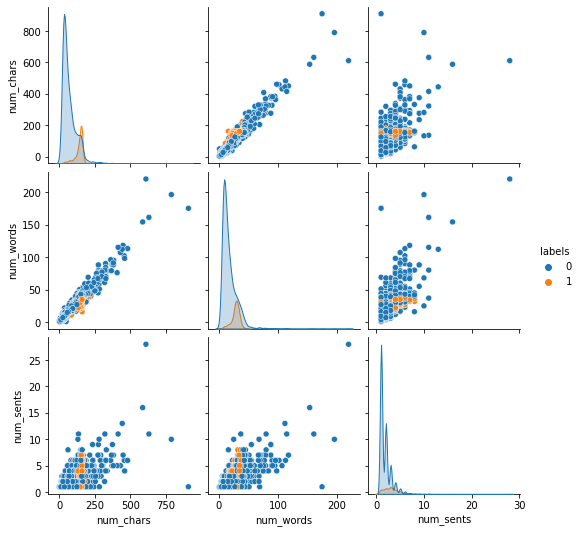

In [28]:
 sns.pairplot(df,hue='labels')

<AxesSubplot:>

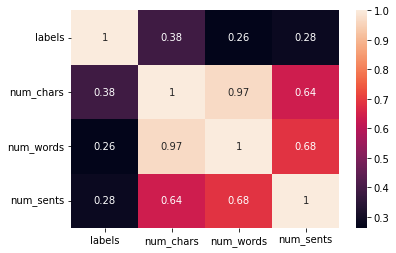

In [29]:
sns.heatmap(df.corr(),annot=True)

# TEXT/DATA PROCESSING
.Lowering
.Tokenization
.Removing Special Charecters
.Removing Stopwords and punctutations
.Stemming

In [30]:
def preproccessing(x):
    from nltk.stem import WordNetLemmatizer
    from nltk.corpus import stopwords
    import re
    sentences=nltk.sent_tokenize(x)
    lm=WordNetLemmatizer()
    y=""
    for sentence in sentences:
        x=re.sub('[^a-zA-Z]',' ',sentence)
        x=x.lower()
        x=x.split()
       
        x=(lm.lemmatize(word) for word in x if word not in set(stopwords.words('english')))
        x=" ".join(x)
        y=y+" "+x
    return y
df['transformedTXT']=df['messages'].apply(preproccessing)
                                  

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13244\1663368528.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformedTXT']=df['messages'].apply(preproccessing)


In [31]:
df

,labels,messages,num_chars,num_words,num_sents,transformedTXT
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry wkly comp win fa cup final tkts st...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darling week word back like fun s...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request melle melle oru minnaminunginte n...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valued network customer selected recei...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobile month u r entitled update latest colou...


In [32]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Forming a WordCloud

In [33]:
#from the wordcloud we can see the words which are repetitive
#from wordcloud import WordCloud
#wc=WordCloud()
#spamWc=wc.generate(df[df['labels']==1]['transformedTXT'].str.cat(sep=" "))
#plt.imshow(spamWc)

In [34]:
#spamWc=wc.generate(df[df['labels']==0]['transformedTXT'].str.cat(sep=" "))

#plt.imshow(spamWc)

In [35]:
#yems=df[df['labels']==1]['transformedTXT'].tolist()#converting the columns of spam into a list
#yems=" ".join(yems)#then converting the list into a single list
#yems=yems.split()
#corp=[]
#for i in range(len(yems)):
 #   for word in range(len(yems)):
  #      if(yems[i]==yems[word]):
   #         c+=1
    #print(yems[i],c)
    #c=0
        
        

In [37]:
#yems=df[df['labels']==0]['transformedTXT'].tolist()#converting the columns of spam into a list
#yems=" ".join(yems)#then converting the list into a single list
#yems=yems.split()
#corp=[]
#for i in range(len(yems)):
 #   for word in range(len(yems)):
        
  #      if(yems[i]==yems[word]):
            #c+=1
   # print(yems[i],c)
    #c=0
        

In [38]:
spam=[]
for i in df[df['labels']==1]["transformedTXT"].tolist():
    for word in i.split():
        spam.append(word)
print(len(spam))

10068


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


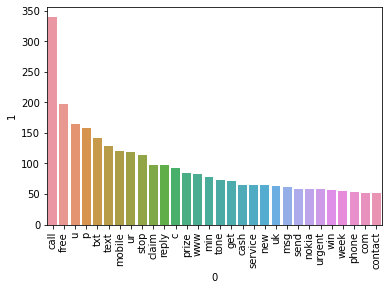

In [39]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam).most_common(30))[0],pd.DataFrame(Counter(spam).most_common(30))[1])#SHOWS THE first 40 most repetitive text)
plt.xticks(rotation="vertical")
plt.show()

In [40]:
ham=[]
for i in df[df['labels']==0]["transformedTXT"].tolist():
    for word in i.split():
        ham.append(word)
print(len(ham))

35388


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


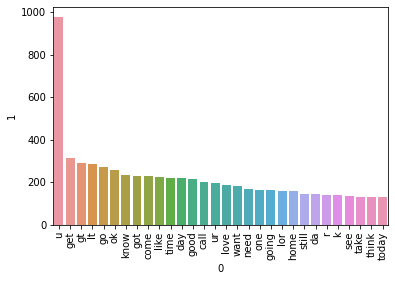

In [41]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham).most_common(30))[0],pd.DataFrame(Counter(ham).most_common(30))[1])#SHOWS THE first 40 most repetitive text)
plt.xticks(rotation="vertical")
plt.show()

#  MODEL BUILDING

In [174]:
#FROM CONVERTING THE TEXTUAL DATA INTO VECTORS(BAG OF WORDS)
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [147]:
X=cv.fit_transform(df["transformedTXT"]).toarray()

In [148]:
X.shape

(5169, 7021)

In [149]:
y=df['labels'].values

In [150]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=2)

In [151]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [152]:
#GAUSSIAN NAIVE BAYES
gnb.fit(Xtrain,ytrain)
ypred1=gnb.predict(Xtest)
print("Accuracy score is",accuracy_score(ytest,ypred1))
print(confusion_matrix(ytest,ypred1))
print("precision score is",precision_score(ytest,ypred1))

Accuracy score is 0.8916827852998066
[[806  90]
 [ 22 116]]
precision score is 0.5631067961165048


In [153]:
#MULTINOMIAL NAIVE BAYES
mnb.fit(Xtrain,ytrain)
ypred1=mnb.predict(Xtest)
print("Accuracy score is",accuracy_score(ytest,ypred1))
print(confusion_matrix(ytest,ypred1))
print("precision score is",precision_score(ytest,ypred1))

Accuracy score is 0.9642166344294004
[[870  26]
 [ 11 127]]
precision score is 0.8300653594771242


In [154]:
#BERNOULLI NAIVE BAYES
bnb.fit(Xtrain,ytrain)
ypred1=bnb.predict(Xtest)
print("Accuracy score is",accuracy_score(ytest,ypred1))
print(confusion_matrix(ytest,ypred1))
print("precision score is",precision_score(ytest,ypred1))

Accuracy score is 0.9738878143133463
[[891   5]
 [ 22 116]]
precision score is 0.9586776859504132


# USING TFIDF

In [175]:
X1=tfidf.fit_transform(df["transformedTXT"]).toarray()

In [176]:
y1=df['labels'].values

In [177]:
X1.shape

(5169, 3000)

In [178]:
from sklearn.model_selection import train_test_split
X1train,X1test,y1train,y1test=train_test_split(X1,y1,test_size=0.2,random_state=2)

In [179]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [180]:
#GAUSSIAN NAIVE BAYES
gnb.fit(X1train,y1train)
y1pred1=gnb.predict(X1test)
print("Accuracy score is",accuracy_score(y1test,y1pred1))
print(confusion_matrix(y1test,y1pred1))
print("precision score is",precision_score(y1test,y1pred1))

Accuracy score is 0.8810444874274661
[[799  97]
 [ 26 112]]
precision score is 0.5358851674641149


In [181]:
#MULTINOMIAL NAIVE BAYES
mnb.fit(X1train,y1train)
y1pred1=mnb.predict(X1test)
print("Accuracy score is",accuracy_score(y1test,y1pred1))
print(confusion_matrix(y1test,y1pred1))
print("precision score is",precision_score(y1test,y1pred1))

Accuracy score is 0.9709864603481625
[[895   1]
 [ 29 109]]
precision score is 0.990909090909091


In [182]:
#BERNOULLI NAIVE BAYES
bnb.fit(X1train,y1train)
y1pred1=bnb.predict(X1test)
print("Accuracy score is",accuracy_score(y1test,y1pred1))
print(confusion_matrix(y1test,y1pred1))
print("precision score is",precision_score(y1test,y1pred1))

Accuracy score is 0.9825918762088974
[[894   2]
 [ 16 122]]
precision score is 0.9838709677419355


In [163]:
#SINCE ITS AN IMBALANCED DATASET SO ACCURACY IS THE BEST MEASURE HERE,SO THE PRECISION SCORE IS MORE IMPORTANT COMPARED TO THE ACCURACY SCORE....SO SINCE THE *MNB WITH TFIDF* IS GIVING PRECISONscore 1.0 so we will go ahead with that

# Testing against other ML MODELS

In [183]:

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier 

In [184]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
adc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)


In [185]:
models={'svc':svc,'kn':knc,'nb':mnb,'dt':dtc,'rf':rfc,'adaboost':adc,'bgc':bc,'etc':etc,'gbdt':gbdt,'xgb':xgb}

In [186]:
 def trainModels(model,X1train,X1test,y1train,y1test):
        model.fit(X1train,y1train)
        y1pred=model.predict(X1test)
        accuracy=accuracy_score(y1test,y1pred)
        precision=precision_score(y1test,y1pred)
        return accuracy,precision

In [189]:
accuracyScores3k=[]
precisionScores3k=[]
for name,model in models.items():
    currentAccu,currentPrec=trainModels(model,X1train,X1test,y1train,y1test)
   
    accuracyScores3k.append(currentAccu)
    precisionScores3k.append(currentPrec)

In [168]:
accuracyScores=[]
precisionScores=[]
for name,model in models.items():
    currentAccu,currentPrec=trainModels(model,X1train,X1test,y1train,y1test)
   
    accuracyScores.append(currentAccu)
    precisionScores.append(currentPrec)

In [169]:
performancedf=pd.DataFrame({"Algorithm":models.keys(),'Accuracy':accuracyScores,'Precision':precisionScores}).sort_values('Precision',ascending=False)

In [170]:
performancedf

,Algorithm,Accuracy,Precision
1,kn,0.907157,1.000000
2,nb,0.962282,1.000000
4,rf,0.976789,1.000000
7,etc,0.975822,0.991304
0,svc,0.973888,0.966387
9,xgb,0.976789,0.959677
5,adaboost,0.974855,0.959016
8,gbdt,0.949710,0.921569
3,dt,0.958414,0.851852
6,bgc,0.954545,0.842105


In [190]:
performancedf1=pd.DataFrame({"Algorithm":models.keys(),'Accuracy3k_features':accuracyScores3k,'Precision3k_features':precisionScores3k}).sort_values('Precision3k_features',ascending=False)

In [191]:
performancedf1

,Algorithm,Accuracy3k_features,Precision3k_features
1,kn,0.911025,1.000000
4,rf,0.975822,0.991304
2,nb,0.970986,0.990909
7,etc,0.978723,0.975410
0,svc,0.974855,0.966667
9,xgb,0.972921,0.950820
8,gbdt,0.948743,0.938144
5,adaboost,0.966151,0.932773
3,dt,0.958414,0.851852
6,bgc,0.957447,0.850746


In [193]:
tempdf=performancedf1.merge(performancedf,on="Algorithm")

In [194]:
tempdf

,Algorithm,Accuracy3k_features,Precision3k_features,Accuracy,Precision
0,kn,0.911025,1.000000,0.907157,1.000000
1,rf,0.975822,0.991304,0.976789,1.000000
2,nb,0.970986,0.990909,0.962282,1.000000
3,etc,0.978723,0.975410,0.975822,0.991304
4,svc,0.974855,0.966667,0.973888,0.966387
5,xgb,0.972921,0.950820,0.976789,0.959677
6,gbdt,0.948743,0.938144,0.949710,0.921569
7,adaboost,0.966151,0.932773,0.974855,0.959016
8,dt,0.958414,0.851852,0.958414,0.851852
9,bgc,0.957447,0.850746,0.954545,0.842105


In [195]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))